In [1]:
import matplotlib
matplotlib.use('Agg')

%matplotlib inline

In [2]:
import pandas as pd
import numpy as np


import pyaf.ForecastEngine as autof
import pyaf.Bench.TS_datasets as tsds



In [3]:

b1 = tsds.load_ozone()
df = b1.mPastData

lTimeVar = u"月"
lSignalVar = u"臭氧"
df[lSignalVar] = df[b1.mSignalVar]
df[lTimeVar] = df[b1.mTimeVar]


     Month  Ozone       Time
0  1955-01    2.7 1955-01-01
1  1955-02    2.0 1955-02-01
2  1955-03    3.6 1955-03-01
3  1955-04    5.0 1955-04-01
4  1955-05    6.5 1955-05-01


In [4]:
df.head()

,Month,Ozone,Time,臭氧,月
0,1955-01,2.7,1955-01-01,2.7,1955-01-01
1,1955-02,2.0,1955-02-01,2.0,1955-02-01
2,1955-03,3.6,1955-03-01,3.6,1955-03-01
3,1955-04,5.0,1955-04-01,5.0,1955-04-01
4,1955-05,6.5,1955-05-01,6.5,1955-05-01


In [5]:

lEngine = autof.cForecastEngine()
H = b1.mHorizon;
lEngine.train(df , lTimeVar , lSignalVar, H);
lEngine.getModelInfo();
print(lEngine.mSignalDecomposition.mTrPerfDetails.head());


INFO:pyaf.std:START_TRAINING '臭氧'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS '臭氧' 3.3155083656311035
INFO:pyaf.std:TIME_DETAIL TimeVariable='月' TimeMin=1955-01-01T00:00:00.000000 TimeMax=1967-09-01T00:00:00.000000 TimeDelta=30 days Estimation = (0 , 153) Validation = (153 , 192) Test = (192 , 204) Horizon=12
INFO:pyaf.std:SIGNAL_DETAIL SignalVariable='_臭氧' Min=1.2 Max=8.7  Mean=3.83578431373 StdDev=1.49155921594
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_臭氧_LinearTrend_residue_zeroCycle_residue_AR(51)' [LinearTrend + NoCycle + AR(51)]
INFO:pyaf.std:TREND_DETAIL '_臭氧_LinearTrend' [LinearTrend]
INFO:pyaf.std:CYCLE_DETAIL '_臭氧_LinearTrend_residue_zeroCycle' [NoCycle]
INFO:pyaf.std:AUTOREG_DETAIL '_臭氧_LinearTrend_residue_zeroCycle_residue_AR(51)' [AR(51)]
INFO:pyaf.std:MODEL_MAPE MAPE_Fit=0.1641 MAPE_Forecast=0.1595 MAPE_Test=0.174
INFO:pyaf.std:MODEL_SMAPE SMAPE_Fit=0.1547 SMAPE_Forecast=0.178 SMAPE_Test=0.182
INFO:pyaf.std:MODEL_MASE MASE_Fit=0.6981 M

  Transformation                                              Model  \
0            _臭氧   _臭氧_LinearTrend_residue_zeroCycle_residue_AR(51)   
1            _臭氧     _臭氧_PolyTrend_residue_zeroCycle_residue_AR(51)   
2            _臭氧  _臭氧_LinearTrend_residue_Seasonal_MonthOfYear_r...   
3            _臭氧  _臭氧_LinearTrend_residue_bestCycle_byL2_residue...   
4        Diff_臭氧  Diff_臭氧_Lag1Trend_residue_zeroCycle_residue_AR...   

   Complexity  FitMAPE  ForecastMAPE  TestMAPE  
0          67   0.1641        0.1595    0.1740  
1          67   0.1640        0.1657    0.3430  
2          20   0.1865        0.1796    0.2567  
3          24   0.1865        0.1796    0.2567  
4         115   0.2233        0.1800    0.2262  


INFO:pyaf.std:START_PLOTTING
/home/antoine/dev/python/packages/pyaf/TS/Plots.py:31: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/antoine/.local/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/anto

/home/antoine/dev/python/packages/pyaf/TS/Plots.py:107: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/antoine/.local/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/antoine/.local/lib/python3.6/sit

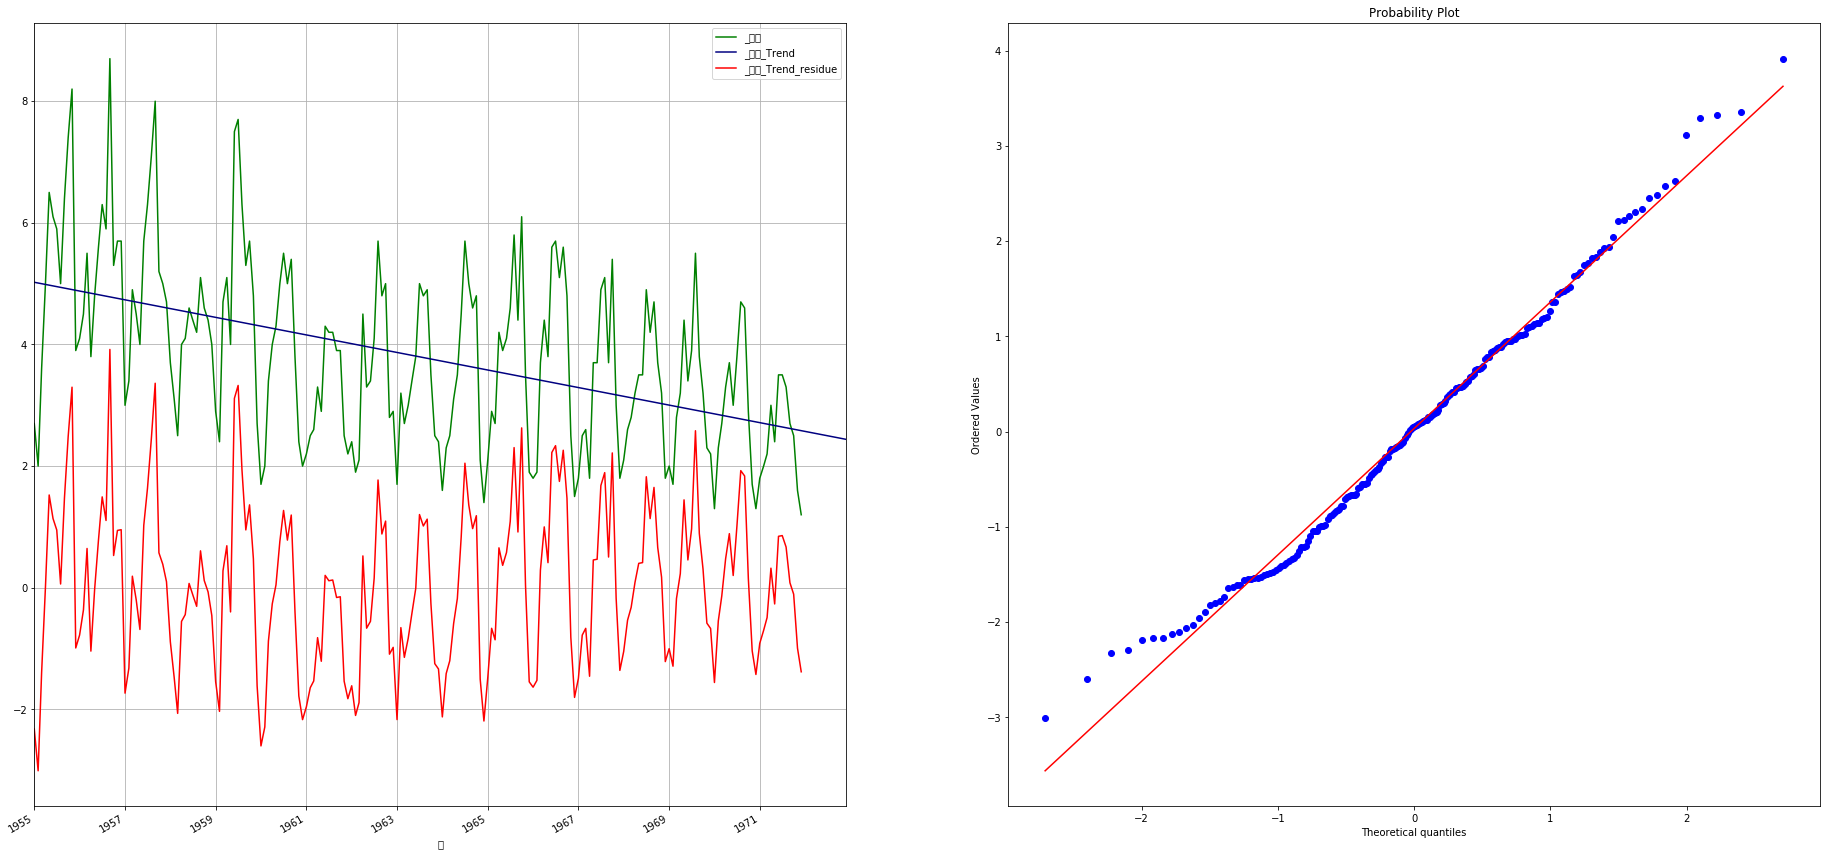

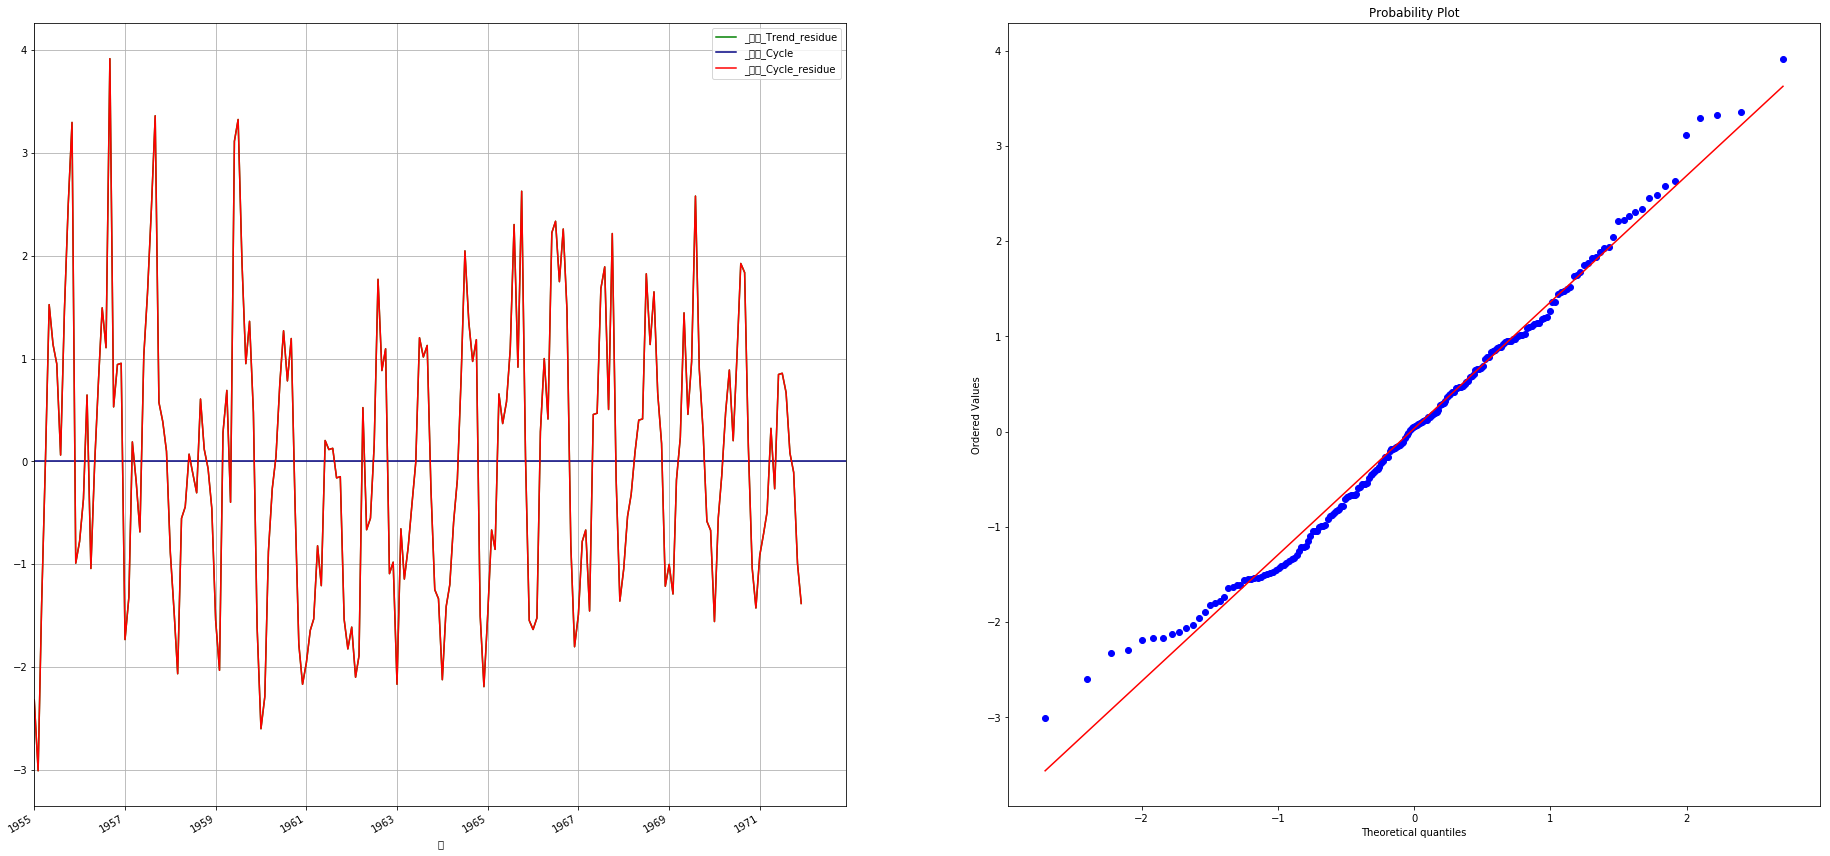

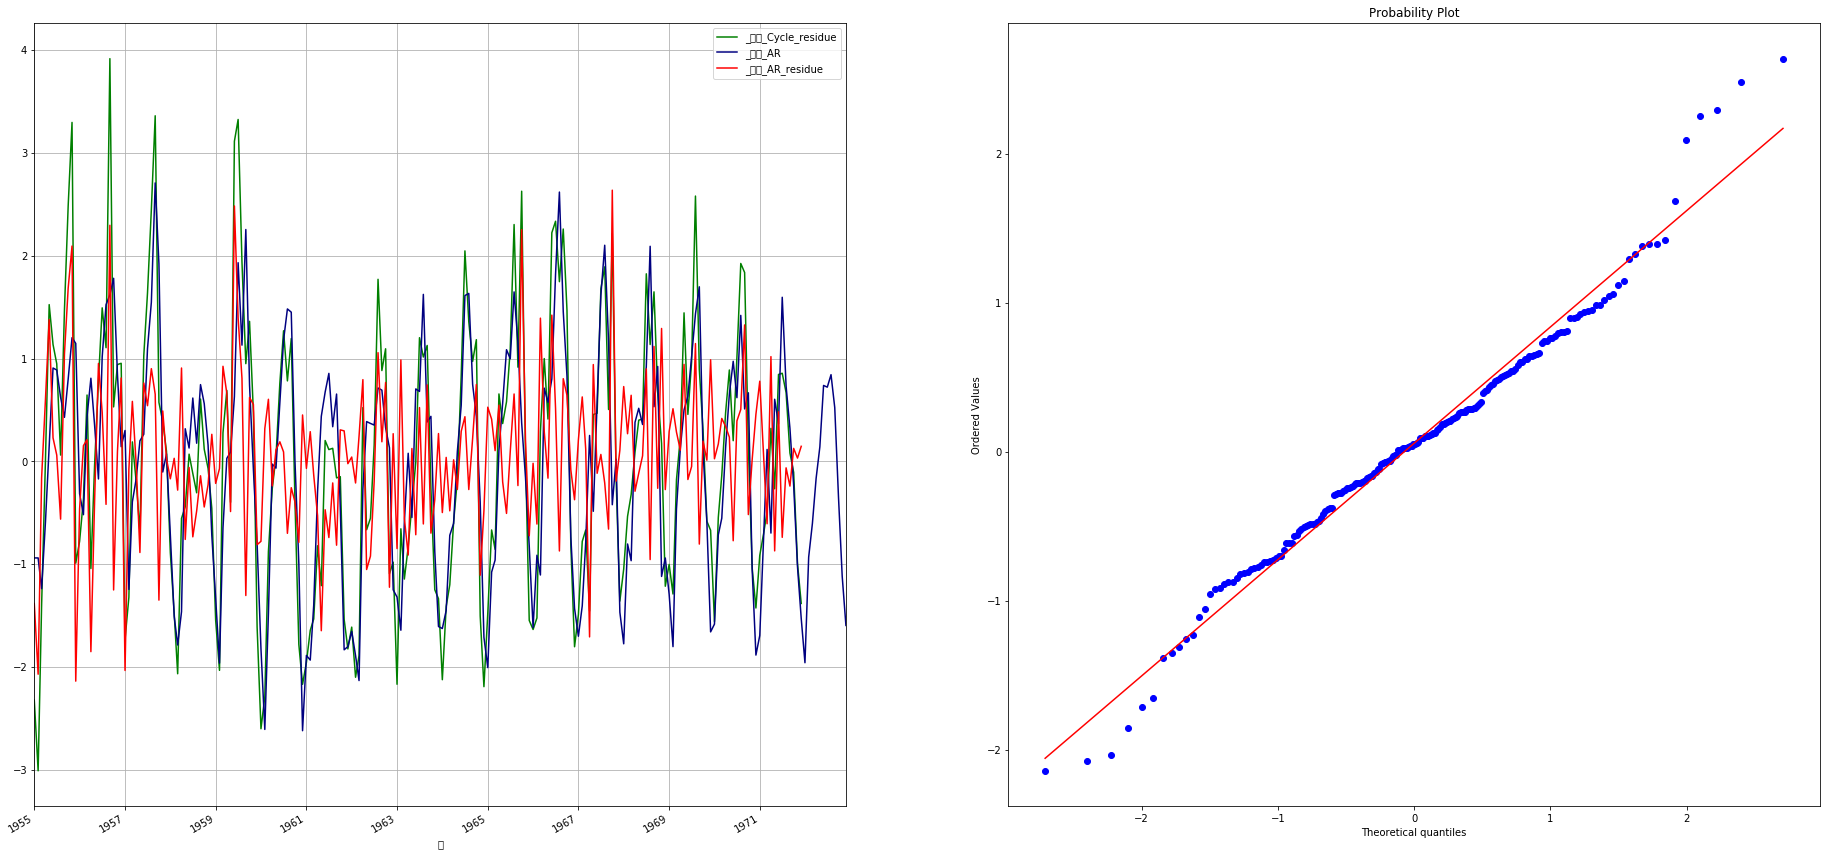

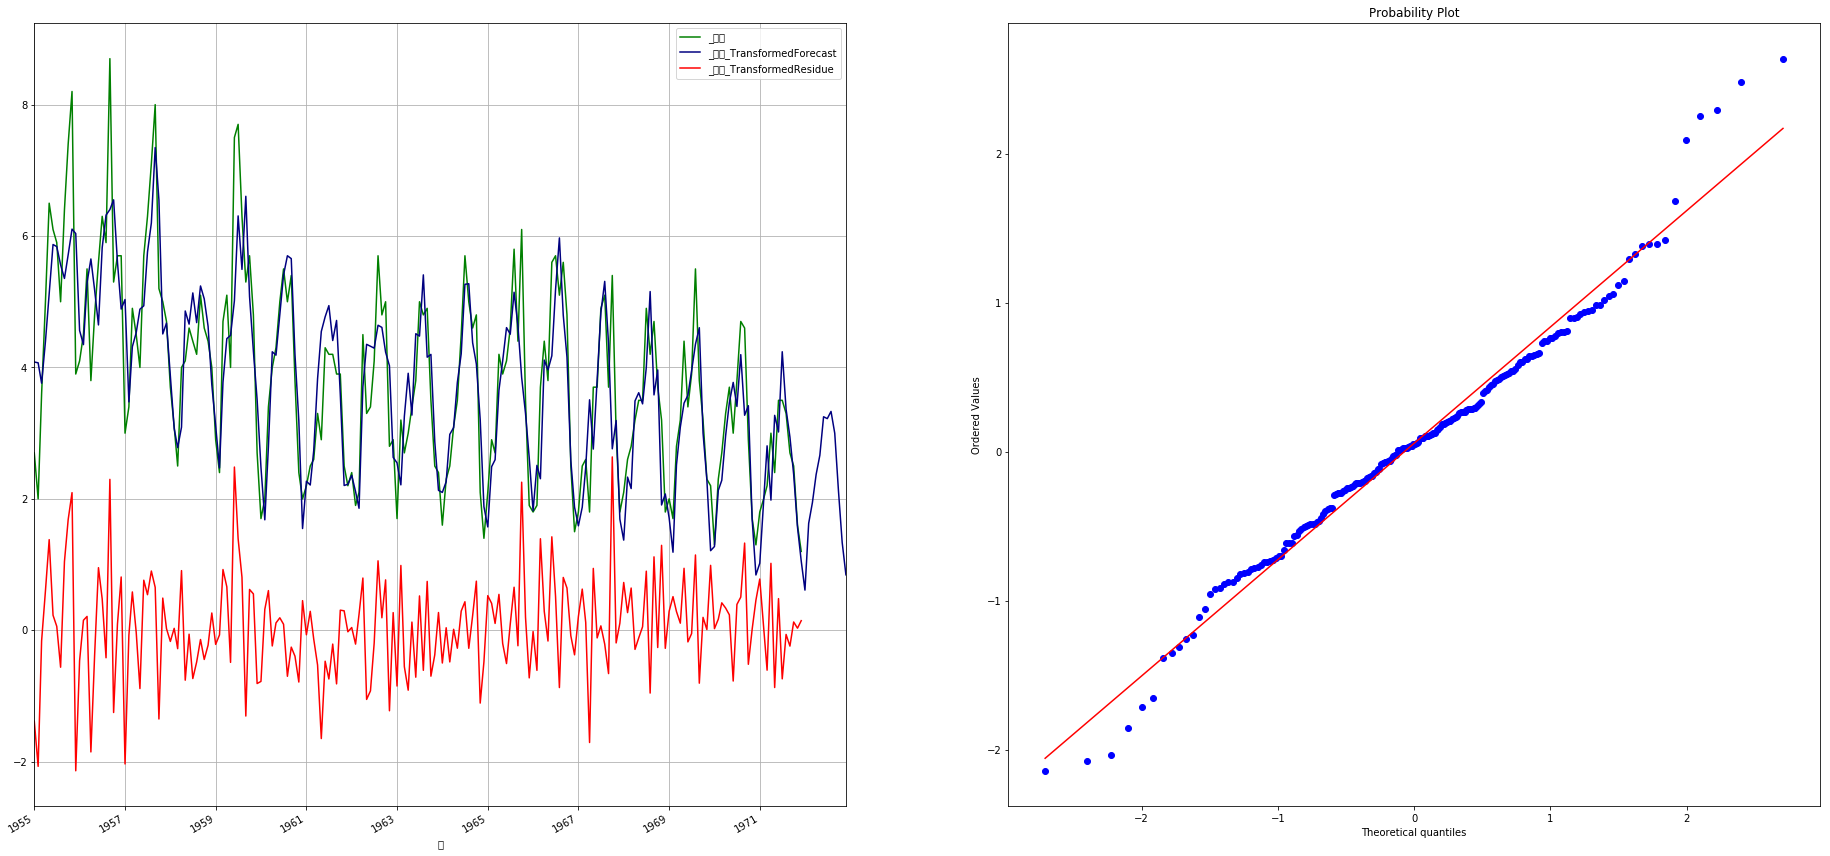

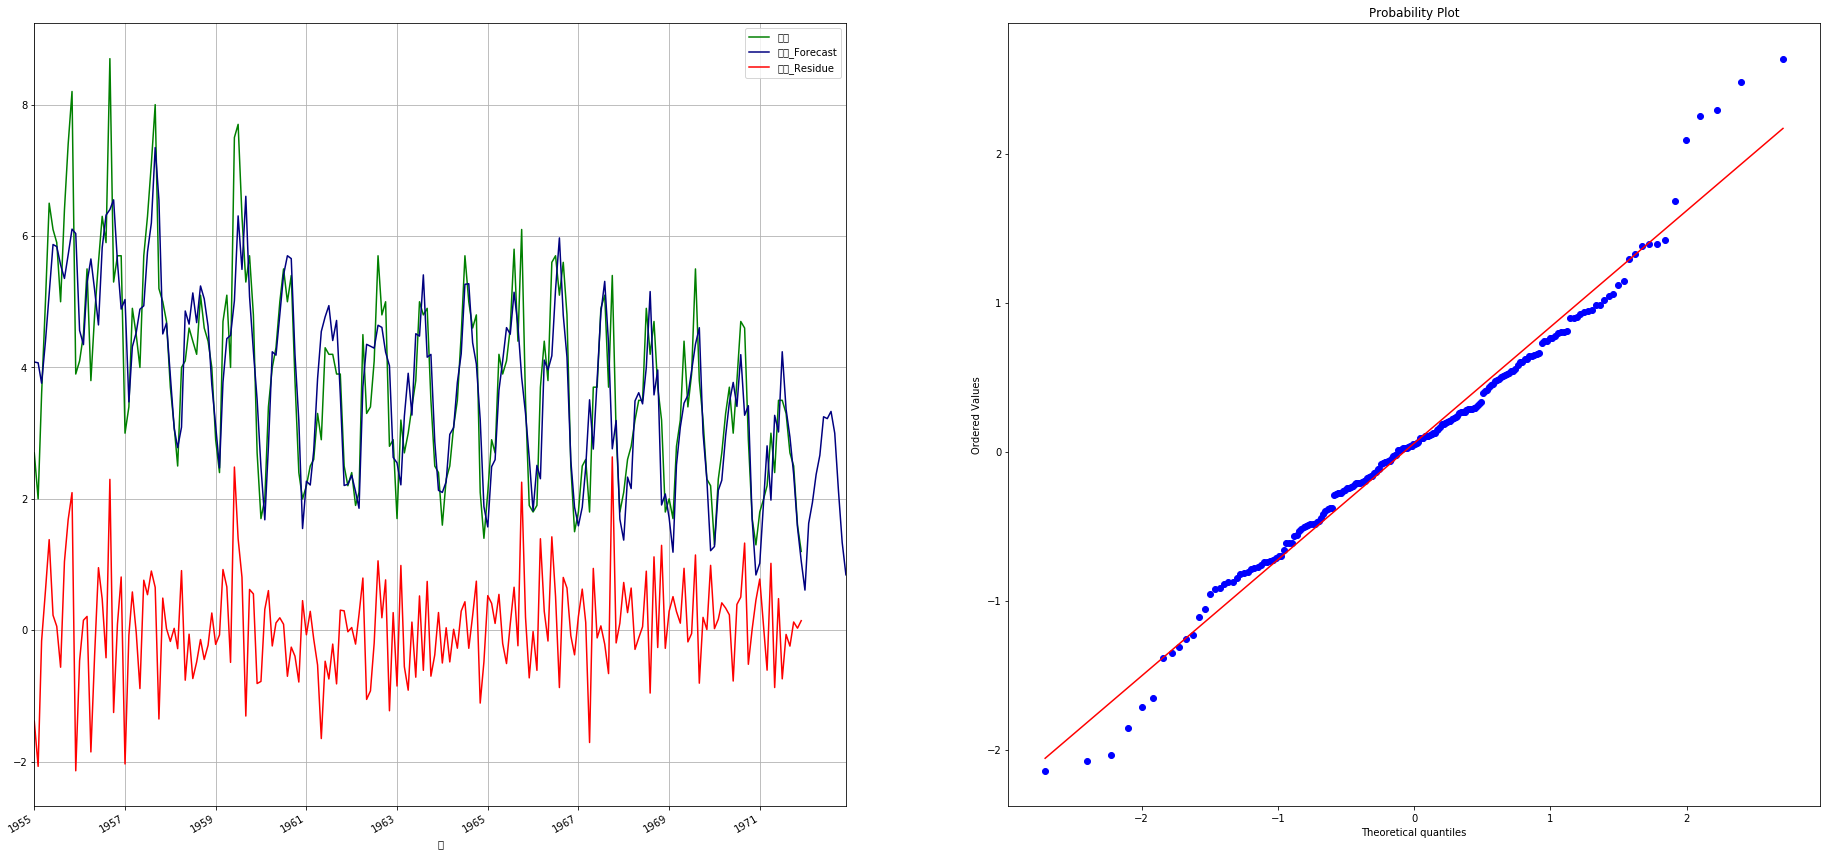

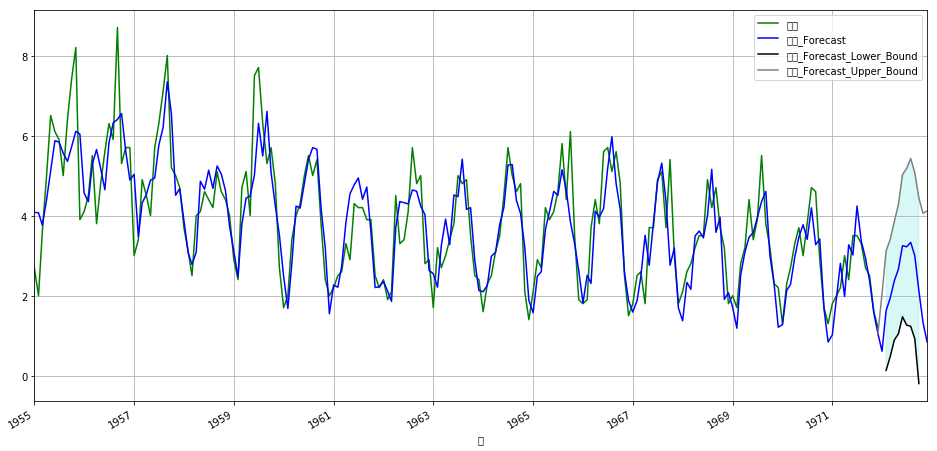

In [6]:
lEngine.standardPlots();

In [7]:
dfapp_in = df.copy();
dfapp_in.tail()

,Month,Ozone,Time,臭氧,月
199,1971-08,3.3,1971-08-01,3.3,1971-08-01
200,1971-09,2.7,1971-09-01,2.7,1971-09-01
201,1971-10,2.5,1971-10-01,2.5,1971-10-01
202,1971-11,1.6,1971-11-01,1.6,1971-11-01
203,1971-12,1.2,1971-12-01,1.2,1971-12-01


In [8]:
dfapp_out = lEngine.forecast(dfapp_in, H);
dfapp_out.to_csv("issue_76_unicode_ozone_apply_out.csv")
print("Forecast Columns " , dfapp_out.columns);
print(dfapp_out.tail(2 * H))
Forecast_DF = dfapp_out[[lTimeVar , lSignalVar, lSignalVar + '_Forecast']]
print(Forecast_DF.info())
print("Forecasts\n" , Forecast_DF.tail(H));


INFO:pyaf.std:START_FORECASTING
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS 0.777534008026123


Forecast Columns  Index(['_臭氧', '月', '臭氧', 'row_number', '月_Normalized', '_臭氧_LinearTrend',
       '_臭氧_LinearTrend_residue', '_臭氧_LinearTrend_residue_zeroCycle',
       '_臭氧_LinearTrend_residue_zeroCycle_residue',
       '_臭氧_LinearTrend_residue_zeroCycle_residue_AR(51)',
       '_臭氧_LinearTrend_residue_zeroCycle_residue_AR(51)_residue', '_臭氧_Trend',
       '_臭氧_Trend_residue', '_臭氧_Cycle', '_臭氧_Cycle_residue', '_臭氧_AR',
       '_臭氧_AR_residue', '_臭氧_TransformedForecast', '臭氧_Forecast',
       '_臭氧_TransformedResidue', '臭氧_Residue', '臭氧_Forecast_Lower_Bound',
       '臭氧_Forecast_Upper_Bound'],
      dtype='object')
     _臭氧          月   臭氧  row_number  月_Normalized  _臭氧_LinearTrend  \
192  1.8 1971-01-01  1.8         192      1.263294         2.714376   
193  2.0 1971-02-01  2.0         193      1.269996         2.702132   
194  2.2 1971-03-01  2.2         194      1.276048         2.691073   
195  3.0 1971-04-01  3.0         195      1.282750         2.678829   
196  2.4 1971-05-01  

In [9]:
open('issue_76_unicode_ozone_apply_out.csv').read().split('\n')[0]

',_臭氧,月,臭氧,row_number,月_Normalized,_臭氧_LinearTrend,_臭氧_LinearTrend_residue,_臭氧_LinearTrend_residue_zeroCycle,_臭氧_LinearTrend_residue_zeroCycle_residue,_臭氧_LinearTrend_residue_zeroCycle_residue_AR(51),_臭氧_LinearTrend_residue_zeroCycle_residue_AR(51)_residue,_臭氧_Trend,_臭氧_Trend_residue,_臭氧_Cycle,_臭氧_Cycle_residue,_臭氧_AR,_臭氧_AR_residue,_臭氧_TransformedForecast,臭氧_Forecast,_臭氧_TransformedResidue,臭氧_Residue,臭氧_Forecast_Lower_Bound,臭氧_Forecast_Upper_Bound'

In [10]:
print("\n\n<ModelInfo>")
print(lEngine.to_json());
print("</ModelInfo>\n\n")
print("\n\n<Forecast>")
print(Forecast_DF.tail(2*H).to_json(date_format='iso'))
print("</Forecast>\n\n")



<ModelInfo>
{
    "Dataset": {
        "Signal": "\u81ed\u6c27",
        "Time": {
            "Horizon": 12,
            "TimeMinMax": [
                "1955-01-01 00:00:00",
                "1971-12-01 00:00:00"
            ],
            "TimeVariable": "\u6708"
        },
        "Training_Signal_Length": 204
    },
    "Model": {
        "AR_Model": "AR(51)",
        "Best_Decomposition": "_\u81ed\u6c27_LinearTrend_residue_zeroCycle_residue_AR(51)",
        "Cycle": "NoCycle",
        "Signal_Transoformation": "None",
        "Trend": "LinearTrend"
    },
    "Model_Performance": {
        "COMPLEXITY": "67",
        "MAE": "0.526531675801",
        "MAPE": "0.1595",
        "MASE": "0.6782",
        "RMSE": "0.731568864951"
    }
}
</ModelInfo>




<Forecast>
{"\u6708":{"192":"1971-01-01T00:00:00.000Z","193":"1971-02-01T00:00:00.000Z","194":"1971-03-01T00:00:00.000Z","195":"1971-04-01T00:00:00.000Z","196":"1971-05-01T00:00:00.000Z","197":"1971-06-01T00:00:00.000Z","198":"1971-

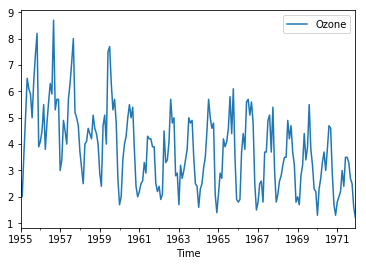

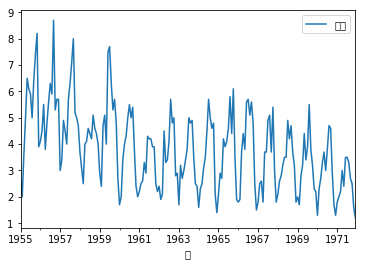

In [17]:
df.plot(df.columns[2] , df.columns[1])
df.plot(df.columns[4] , df.columns[3])


In [14]:
df.columns

Index(['Month', 'Ozone', 'Time', '臭氧', '月'], dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 5 columns):
Month    204 non-null object
Ozone    204 non-null float64
Time     204 non-null datetime64[ns]
臭氧       204 non-null float64
月        204 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(1)
memory usage: 8.0+ KB
